# Lab 5. Data Modeling

### Lab Assignment 5.1. Clustering

Many U.S. cities, the U.S. federal government, and even other cities and governments abroad have started subscribing to an Open Data policy, because some data should be transparent and available to everyone to use and republish freely, without restrictions from copyright, patents, or other mechanisms of control. After reading their terms of use, in this lab you'll be exploring the City of Chicago's Crime data set, which is part of their Open Data initiative.

1. Start by navigating over to the [City of Chicago's Crimes dataset](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) exploration page. It lists crimes from 2001 to the present, but you'll only be targeting <b>Gambling</b>. The city's website itself has hundreds of other datasets you can browse and do machine learning on.
2. Open up the /Module5/assignment1.py starter code, and follow the directions to acquire the dataset and properly set it up.
3. Fill out the doKMeans method to find and plot <b>seven clusters</b> and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.
4. Re-run your assignment a few times over, looking at your printed and plotted results. Then answer the following questions.

Note: If Pandas complains about your data, you can use dropna() on any row that has nans in it.

In [71]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [72]:
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

In [73]:
#TODO: Load your dataset after importing Pandas
# .. your code here ..
crime_df = pd.read_csv('Module5/Datasets/Crimes_2001_to_present.csv')
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7,43,19,1194833,1855572,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27,23,19,1150871,1903067,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28,25,19,1142605,1904502,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29,25,19,1138430,1900175,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17,67,19,1167231,1856980,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"


In [74]:
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
print crime_df.isnull().sum()
print 

crime_df = crime_df.dropna(axis=0)
print crime_df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    1124
Community Area          1124
FBI Code                   0
X Coordinate              99
Y Coordinate              99
Year                       0
Updated On                 0
Latitude                  99
Longitude                 99
Location                  99
dtype: int64

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community 

In [75]:
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
crime_df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [76]:
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
crime_df.Date = pd.to_datetime(crime_df.Date, errors='coerce')
crime_df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [81]:
def doKMeans(df):
    # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure(figsize(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    #
    # TODO: Filter df so that you're only looking at Longitude and Latitude,
    # since the remaining columns aren't really applicable for this purpose.
    #
    # .. your code here ..
    crime_df_filtered = crime_df.loc[:, ('Longitude', 'Latitude') ]
    
    #
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    #
    # .. your code here ..
    kmeans_model = KMeans(n_clusters=7)
    kmeans_model.fit(crime_df_filtered)
    labels = kmeans_model.predict(crime_df_filtered)
    
    #
    # INFO: Print and plot the centroids...
    centroids = kmeans_model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    print centroids

[[-87.61959168  41.80369163]
 [-87.75691846  41.89346805]
 [-87.63131433  41.69693969]
 [-87.684885    41.98183762]
 [-87.58274601  41.75282918]
 [-87.6647008   41.77292924]
 [-87.7095634   41.87814769]]


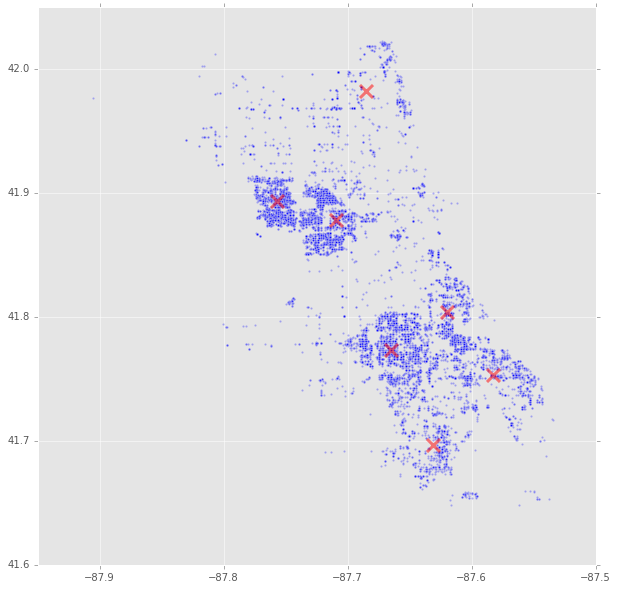

In [82]:
# INFO: Print & Plot your data
doKMeans(crime_df)

In [83]:
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..
crime_df_incident = crime_df[ crime_df['Date'] > '2011-01-01']
crime_df_incident.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
278,10510010,HZ251574,2016-05-04 19:15:00,057XX S RACINE AVE,1661,GAMBLING,GAME/DICE,PARK PROPERTY,True,False,...,16,68,19,1169299,1866781,2016,05/11/2016 03:50:55 PM,41.789957,-87.654766,"(41.78995655, -87.654766198)"
2734,10479729,HZ218796,2016-04-08 23:46:00,036XX N HARLEM AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,36,17,19,1127424,1923430,2016,04/15/2016 09:20:50 AM,41.946215,-87.807039,"(41.946214574, -87.807039472)"
2735,10517943,HZ260064,2016-05-11 11:45:00,054XX W WALTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,37,25,19,1139916,1905802,2016,05/18/2016 03:50:36 PM,41.897622,-87.761554,"(41.897621763, -87.761554236)"
2736,10518836,HZ260859,2016-05-11 21:00:00,034XX W IRVING PARK RD,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,35,16,19,1152529,1926373,2016,05/18/2016 03:50:36 PM,41.953830,-87.714683,"(41.953830299, -87.714682629)"
2737,10520278,HZ262293,2016-05-12 22:45:00,006XX N LOCKWOOD AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28,25,19,1140914,1903732,2016,05/19/2016 03:50:56 PM,41.891923,-87.757940,"(41.891923124, -87.757939633)"


[[-87.684885    41.98183762]
 [-87.66478908  41.77283604]
 [-87.58192409  41.75206748]
 [-87.63120286  41.6966652 ]
 [-87.75688144  41.89346099]
 [-87.70943747  41.87809817]
 [-87.61919213  41.80242587]]


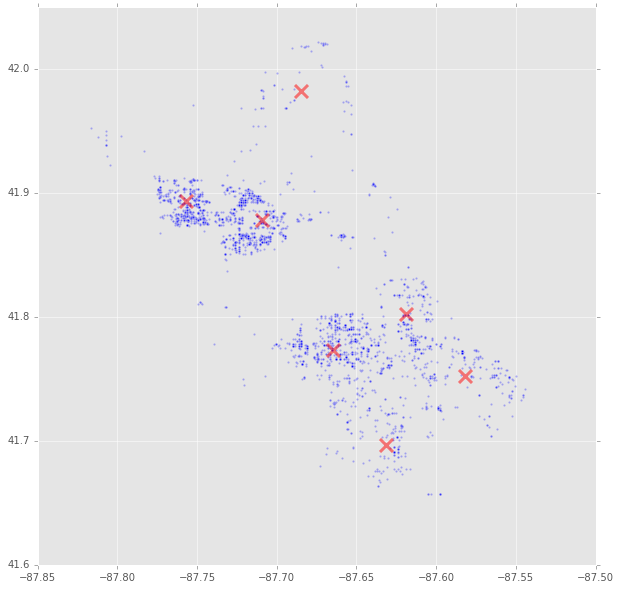

In [84]:
# INFO: Print & Plot your data
doKMeans(crime_df_incident)
plt.show()

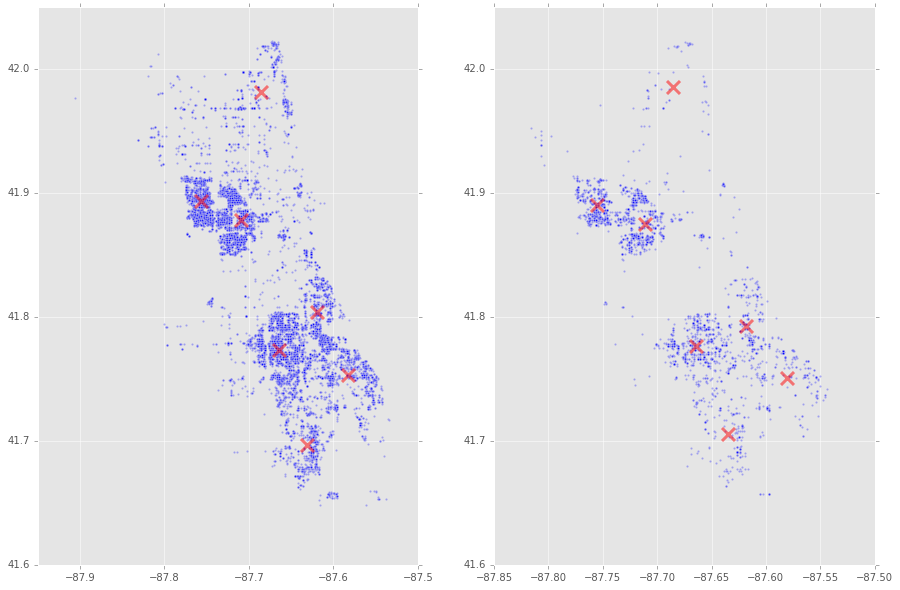

In [85]:
# My testing
fig2 = plt.figure(figsize(15,10))

ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.scatter(crime_df.Longitude, crime_df.Latitude, marker='.', alpha=0.3)
ax2.scatter(crime_df_incident.Longitude, crime_df_incident.Latitude, marker='.', alpha=0.3)

crime_df_filtered = crime_df.loc[:, ('Longitude', 'Latitude') ]
crime_df_filtered_2 = crime_df_incident.loc[:, ('Longitude', 'Latitude') ]

kmeans_model = KMeans(n_clusters=7)
kmeans_model2 = KMeans(n_clusters=7)
kmeans_model.fit(crime_df_filtered)
kmeans_model2.fit(crime_df_filtered_2)

centroids = kmeans_model.cluster_centers_
centroids2 = kmeans_model2.cluster_centers_

ax1.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
ax2.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)

### Lab Questions 5.1.

(2 points possible)
You'll notice that the cluster assignments are pretty accurate. Most of them should be spot-on, dead-center. Only one cluster might have been assigned to outliers. Given the results, answer the following questions to the best of your ability:

##### Q1.Did your centroid locations change after you limited the date range to +2011?
- Tremendously
- Only slightly
- The centroid did not move at all.

<b>* My answer</b>: Only slightly (<== <b>Correct!</b>)


##### Q2.What about during successive runs of your assignment? Any centroid location changes happened there?
- A. All clusters have moved, and the cluster arrangement isn't anything like it was before
- B. All clusters have moved but only slightly, and the centroid arrangement still has the same shape for the most part
- C. The clusters did not really move at all, or if they did, it wasn't noticeable
- D. The cluster centroids are identical according to the print statement output

<b>* My answer</b>: B (<== <b>Correct!</b>)


In [67]:
######################################################################

### Lab Assignment 5.2

The spirit of data science includes exploration, traversing the unknown, and applying a deep understanding of the challenge you're facing. In an academic setting, it's hard to duplicate these tasks, but this lab will attempt to take a few steps away from the traditional, textbook, "plug the equation in" pattern, so you can get a taste of what analyzing data in the real world is all about.

After the September 11 attacks, a series of secret regulations, laws, and processes were enacted, perhaps to better protect the citizens of the United States. These processes continued through president Bush's term and were renewed and and strengthened during the Obama administration. Then, on May 24, 2006, the United States Foreign Intelligence Surveillance Court (FISC) made a fundamental shift in its approach to Section 215 of the Patriot Act, permitting the FBI to compel production of "<i>business records</i>" relevant to terrorism investigations, which are shared with the NSA. The court now defined as business records the entirety of a telephone company's call database, also known as Call Detail Records (CDR or <i>metadata</i>).

News of this came to public light after an ex-NSA contractor leaked the information, and a few more questions were raised when it was further discovered that not just the call records of suspected terrorists were being collected in bulk... but perhaps the entirety of Americans as a whole. After all, if you know someone who knows someone <i>who knows someone</i>, your private records are relevant to a terrorism investigation. The white house quickly reassured the public in [a press release](http://www.cbsnews.com/news/obama-nobody-is-listening-to-your-telephone-calls/) that "Nobody is listening to your telephone calls," since, "that's not what this program is about." The public was greatly relieved.

The questions you'll be exploring in this lab assignment using K-Means are: exactly how useful <b>is</b> telephone metadata? It must have some use, otherwise the government wouldn't have invested however many millions they did into it secretly collecting it from phone carriers. Also what kind of intelligence can you extract from CDR metadata besides its face value?

You will be using a sample CDR dataset generated for 10 people living in the Dallas, Texas metroplex area. Your task will be to attempt to do what many researchers [have already](http://journals.plos.org/plosone/article/asset?unique&id=info:doi/10.1371/journal.pone.0020814.s001) successfully done - partly de-anonymize the CDR data. People generally behave in predictable manners, moving from home to work with a few errands in between. With enough call data, given a few <b><i>K</i></b>-locations of interest, K-Means should be able to isolate rather easily the geolocations where a person spends the most of their time.

Note: to safeguard from doxing people, the CDR dataset you'll be using for this assignment was <i>generated</i> using the tools available in the Dive Deeper section. CDRs are at least supposed to be protected by privacy laws, and are the basis for proprietary revenue calculations. In reality, there are quite a few public CDRs out there. Much information can be discerned from them such as social networks, criminal acts, and believe it or not, even the spread of decreases as was demonstrated by [Flowminder Foundation paper on Ebola](http://www.worldpop.org.uk/ebola/Flowminder-Mobility-Data-21.08.14.pdf). 

1. Open up the starter code in /Module5/assignment2.py and read through it all. It's long, so make sure you understand everything that is being asked for you before proceeding.
2. Load up the CDR dataset from /Module5/Datasets/CDR.csv. Do your due diligence to make sure it's been loaded correctly and all the features and rows match up.
3. Pick the first unique user in the list to examine. Follow the steps in the assignment file to approximate where the user lives.
4. Once you have a (<b>Latitude, Longitude</b>) coordinate pair, drop them into Google Maps. Just do a search for the "{Lat, Lon}". So if your centroid is located at Longitude = <b>-96.949246</b> and Latitude = <b>32.953856</b>, then do a maps search for "[32.953856, -96.949246](https://www.google.com/maps/place/32%C2%B057'13.9%22N+96%C2%B056'57.3%22W/@32.953856,-96.950343,18z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d32.953856!4d-96.949246)".
5. Answer the questions below.


In [2]:
# Load the libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!

# TODO: Load up the dataset and take a peek at its head
# .. your code here ..
cdr_df = pd.read_csv('Module5/Datasets/CDR.csv')
cdr_df.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [65]:
cdr_df.dtypes

In             int64
Out            int64
Direction     object
CallDate      object
CallTime      object
DOW           object
Duration      object
TowerID       object
TowerLat     float64
TowerLon     float64
dtype: object

In [68]:
# TODO: 
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
# .. your code here ..
cdr_df.CallDate = pd.to_datetime(cdr_df.CallDate, errors='coerce')
cdr_df.CallTime = pd.to_timedelta(cdr_df.CallTime, errors='coerce')
cdr_df.dtypes

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

In [14]:
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
#
# .. your code here ..
incall_list = pd.np.array( unique(cdr_df['In']) ).tolist()
incall_list # (결과에 원래 순서 잃어 버리고 값들 정렬해버림).

[1559410755,
 1884182865,
 2068627935,
 2419930464,
 2894365987,
 3688089071,
 4555003213,
 4638472273,
 4931532174,
 8549533077]

In [71]:
# Other's code (정렬하지 않고  결과 순서 보존)
in_numbers = list(cdr_df.In.unique())
in_numbers

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [11]:
### 테스트 결과 unique(cdr_df['In'])와 cdr_df['In'].unique()  두 개의 결과가 다름 
## (즉, 값이 정렬되거나 정렬되지 않고 원래 순서 보존)
list(unique(cdr_df['In'])) # 요건 값이 정렬되어 나옴 (원래 순서 없어짐)

[1559410755,
 1884182865,
 2068627935,
 2419930464,
 2894365987,
 3688089071,
 4555003213,
 4638472273,
 4931532174,
 8549533077]

In [12]:
list(cdr_df['In'].unique()) # 정렬되지 않고 원래 순서 보존

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [17]:
## Therefore, 우리가 원하는 코드는 아래처럼 원래 순서 보존하는 거
incall_list = pd.np.array( cdr_df['In'].unique() ).tolist()
incall_list 

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [72]:
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above
#
# .. your code here ..
#user1 = cdr_df[ cdr_df['In'] == incall_list[0]] # 1559410755 (원래는 4638472273이어야 )
user1 = cdr_df[ cdr_df['In'] == 4638472273]
user1.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [47]:
# My testing (all incall numbers)
cdr_df[ cdr_df['In'].isin(incall_list) ].head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [48]:
def showandtell(title=None):
    if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
    plt.show()
    exit()

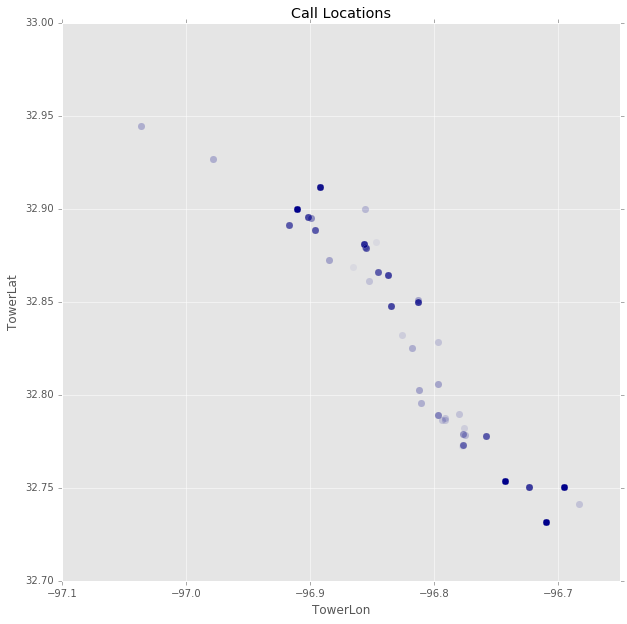

In [79]:
# INFO: Plot all the call locations
fig = plt.figure(figsize(10,10))
user1.plot.scatter(x='TowerLon', y='TowerLat', c='darkblue', alpha=0.05, title='Call Locations', s=50)
#showandtell()  # Comment this line out when you're ready to proceed

In [50]:
# INFO: The locations map above should be too "busy" to really wrap your head around. 
# This is where domain expertise comes into play. Your intuition tells you that people 
# are likely to behave differently on weekends:

# On Weekends:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday

In [51]:
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're
# only examining records that came in on weekends (sat/sun).
#
# .. your code here ..

In [52]:
unique(cdr_df['DOW'])

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thr', 'Tue', 'Wed'], dtype=object)

In [53]:
user1_weekend = user1[ cdr_df['DOW'].isin( ['Sat', 'Sun'] ) ]
print unique(user1_weekend['DOW'])
user1_weekend.head()

['Sat' 'Sun']


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [81]:
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00).
# You can use < and > to compare the string times, just make sure you code them as military time
# strings, eg: "06:00:00", "22:00:00": https://en.wikipedia.org/wiki/24-hour_clock

# My initial
# user1_weekend_call_hr = user1_weekend[ ~( (user1_weekend['CallTime'] >= '06:00:00') & (user1_weekend['CallTime'] < '22:00:00'))] 

# Just for testing
user1_weekend_call_hr = user1_weekend_call_hr[(user1_weekend_call_hr['CallTime'] < "06:00:00") | (user1_weekend_call_hr['CallTime'] > "22:00:00")]
user1_weekend_call_hr.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,22:22:33.693878,Sat,0:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,22:21:27.466908,Sat,0:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,22:59:23.206408,Sat,0:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,05:15:40.205917,Sun,0:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,05:08:20.121145,Sat,0:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417


In [82]:
# You might also want to review the Data Manipulation section for this. 
# Once you have your filtered slice, print out its length:
#
# .. your code here ..
# http://stackoverflow.com/a/15943975/1473062
print "df.shape:\n", user1_weekend_call_hr.shape
print 
print "df.index:\n", user1_weekend_call_hr.index
print 
print "len(df):\n", len(user1_weekend_call_hr)
print 
print "len(df.index):\n", len(user1_weekend_call_hr.index)
print 
print "df.count():\n", user1_weekend_call_hr.count()

df.shape:
(28, 10)

df.index:
Int64Index([  940,  1875,  6949,  7468,  9753, 13951, 17515, 21638, 22045,
            22502, 27866, 31975, 32605, 32606, 34427, 38110, 38564, 39870,
            40275, 40789, 41757, 41758, 42224, 44498, 44927, 44994, 49203,
            51586],
           dtype='int64')

len(df):
28

len(df.index):
28

df.count():
In           28
Out          28
Direction    28
CallDate     28
CallTime     28
DOW          28
Duration     28
TowerID      28
TowerLat     28
TowerLon     28
dtype: int64


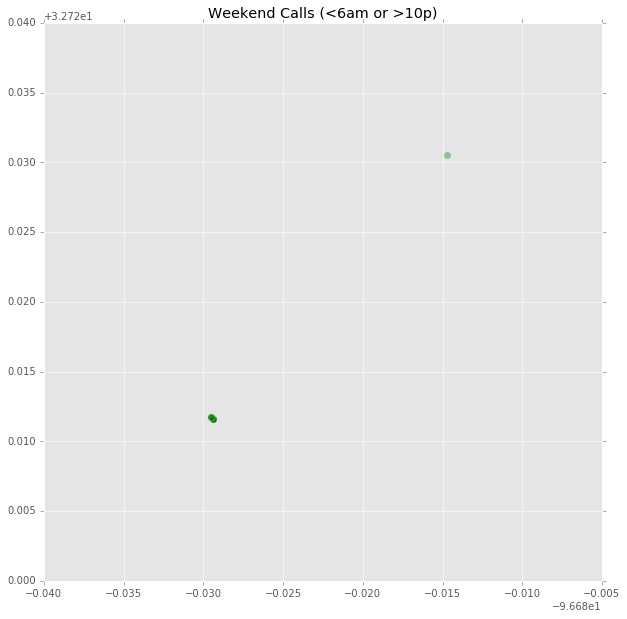

In [85]:
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar
# with maps, you know well that your X-Coordinate should be Longitude, and your Y coordinate
# should be the tower Latitude. Check the dataset headers for proper column feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell
# phone tower position data; but considering the below are for Calls that arrived in the 
# twilight hours of weekends, it's likely that wherever they are bunched up is probably near 
# where the caller's residence:
fig = plt.figure(figsize(10,10))
ax = fig.add_subplot(111)
ax.scatter(user1_weekend_call_hr.TowerLon, user1_weekend_call_hr.TowerLat, c='g', marker='o', alpha=0.2, s=50)
ax.set_title('Weekend Calls (<6am or >10p)')
#showandtell()  # TODO: Comment this line out when you're ready to proceed



[[-96.83107475  32.7364761 ]
 [-96.84757389  32.90195337]]


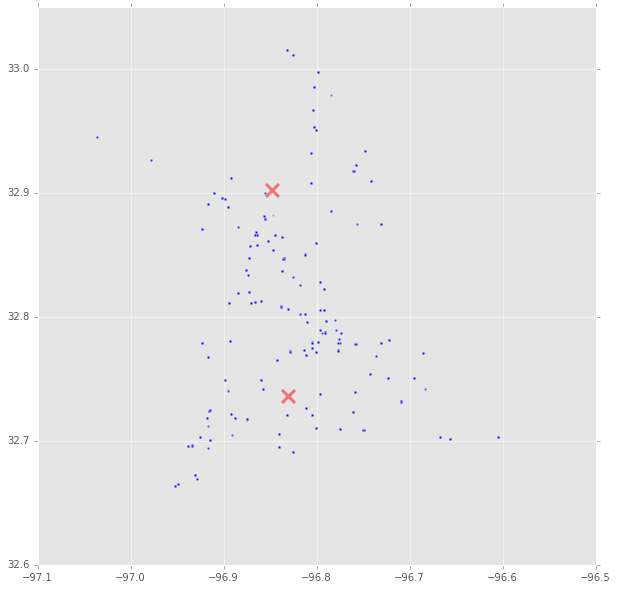

In [86]:
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you
# notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
# apart from one another), then increase K=2, with the goal being that one of the centroids will
# sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
# data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
# no feature scaling is required. Print out the centroid locations and add them onto your scatter
# plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
# .. your code here ..
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2)
cdr_df_km = cdr_df.loc[:, ('TowerLon', 'TowerLat')]
kmeans_model.fit(cdr_df_km)

labels = kmeans_model.predict(cdr_df_km)

centroids = kmeans_model.cluster_centers_
print centroids

fig = plt.figure(figsize(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(cdr_df_km.TowerLon, cdr_df_km.TowerLat, marker='.', alpha=0.3)
ax1.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, s=169, linewidths=3)

#showandtell()  # TODO: Comment this line out when you're ready to proceed

In [92]:
# TODO: Repeat the above steps for all 10 individuals, being sure to record their approximate home
# locations. You might want to use a for-loop, unless you enjoy typing.
#
# .. your code here ..
def MyKMeans(ncluster, mydf):
    kmeans_model = KMeans(n_clusters = ncluster)
    df_local = mydf.loc[:, ('TowerLon', 'TowerLat')]
    kmeans_model.fit(df_local)
    centroids = kmeans_model.cluster_centers_
    print "# of clusters: ", ncluster
    print centroids, '\n'

for i in range(1,11):
    MyKMeans(i, user1_weekend_call_hr)

# of clusters:  1
[[-96.70839404  32.73299989]] 

# of clusters:  2
[[-96.70944573  32.73164942]
 [-96.694722    32.750556  ]] 

# of clusters:  3
[[-96.709417  32.731611]
 [-96.694722  32.750556]
 [-96.7095    32.731722]] 

# of clusters:  4
[[-96.709417  32.731611]
 [-96.694722  32.750556]
 [-96.7095    32.731722]
 [-96.7095    32.731722]] 

# of clusters:  5
[[-96.7095    32.731722]
 [-96.694722  32.750556]
 [-96.709417  32.731611]
 [-96.7095    32.731722]
 [-96.7095    32.731722]] 

# of clusters:  6
[[-96.7095    32.731722]
 [-96.694722  32.750556]
 [-96.709417  32.731611]
 [-96.7095    32.731722]
 [-96.7095    32.731722]
 [-96.709417  32.731611]] 

# of clusters:  7
[[-96.7095    32.731722]
 [-96.694722  32.750556]
 [-96.709417  32.731611]
 [-96.7095    32.731722]
 [-96.7095    32.731722]
 [-96.709417  32.731611]
 [-96.709417  32.731611]] 

# of clusters:  8
[[-96.694722  32.750556]
 [-96.709417  32.731611]
 [-96.7095    32.731722]
 [-96.7095    32.731722]
 [-96.7095    32.731722

In [68]:
######################################################################

### Lab Assignment 5.3

Continuing on with the previous lab, this time you'll validate your results by comparing the user's weekday activity to their weekend activity. To get started, use the starter code in /Module5/assignment3.py.

1. Load up the same CDR dataset into a dataframe, and extract the unique "<b>In</b>" phone numbers. You don't have to save it as a Python list this time, and can keep it as an NDArray. The previous lab had you convert to a list just so you'd have the experience doing it.
2. Create a new slice, once again for the first unique number in the CDR. Instead of limiting it to Weekend only entries, index it so that the slice only contains Weekday entries, <b>Mon-Fri</b>, and so that it occurs any time before 5pm.
3. Run K-Means on the data with K=4. Plot the cellphone towers the user connected to, and then plot the cluster centers using a different marker and color.
4. Answer the questions.

In [1]:
# Load libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
%pylab inline

matplotlib.style.use('ggplot') # Look Pretty

Populating the interactive namespace from numpy and matplotlib


In [2]:
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live at!

# TODO: Load up the dataset and take a peek at its head and dtypes.
cdr_df = pd.read_csv('Module5/Datasets/CDR.csv')
cdr_df.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [3]:
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
cdr_df.dtypes

In             int64
Out            int64
Direction     object
CallDate      object
CallTime      object
DOW           object
Duration      object
TowerID       object
TowerLat     float64
TowerLon     float64
dtype: object

In [4]:
cdr_df['CallDate'] = pd.to_datetime(cdr_df['CallDate'], errors='coerce')
cdr_df['CallTime'] = pd.to_timedelta(cdr_df['CallTime'], errors='coerce')

In [5]:
cdr_df.dtypes

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

In [19]:
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
# .. your code here ..

incall_list = pd.np.array( cdr_df['In'].unique() ).tolist()
#incall_list = list(cdr_df['In'].unique())  <--  요렇게 해도 됨
incall_list 

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [20]:
# INFO: The locations map above should be too "busy" to really wrap your head around. This
# is where domain expertise comes into play. Your intuition tells you that people are likely
# to behave differently on weekends:
#
# On Weekdays:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday

In [21]:
print "\n\nExamining person: ", 0



Examining person:  0


In [22]:
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above
#
# .. your code here ..
user1 = cdr_df[ cdr_df['In'] == incall_list[0]] # 4638472273
user1.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [23]:
# TODO: Alter your slice so that it includes only Weekday (Mon-Fri) values.
# (여기서부터 assignment 2와 달라짐)
# .. your code here ..
user1_weekdays = user1[~((user1['DOW'] == 'Sat') | (user1['DOW'] == 'Sun')) ]
user1_weekdays.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
161,4638472273,5912117253,Missed,2010-12-27,18:41:14.639828,Mon,0:00:20.304073,09756fb6-223f-43e9-9402-9b90c7048639,32.805667,-96.796667
194,4638472273,4217121115,Incoming,2010-12-28,21:36:14.190286,Tue,0:05:56.080785,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
195,4638472273,6022767590,Incoming,2010-12-28,19:57:19.501140,Tue,0:02:38.219371,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
196,4638472273,5621270003,Incoming,2010-12-28,17:10:15.465881,Tue,0:01:56.250335,78512965-e30b-4734-ae92-47b910fe3d7f,32.899944,-96.910389
197,4638472273,5481755331,Incoming,2010-12-28,16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [24]:
# Just for testing
user1_weekdays.DOW.unique()

array(['Mon', 'Tue', 'Wed', 'Thr', 'Fri'], dtype=object)

In [26]:
# TODO: The idea is that the call was placed before 5pm. 
# From Midnight-730a, the user is probably sleeping and won't call / wake up to take a call. 
# There should be a brief time in the morning during their commute to work, then they'll spend 
# the entire day at work. So the assumption is that most of the time is spent either at work, 
# or in 2nd, at home.
#
# .. your code here ..
user1_weekdays_call_hr = user1_weekdays[(user1_weekdays['CallTime'] < "17:00:00") ]
user1_weekdays_call_hr.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
248,4638472273,8180005891,Missed,2010-12-29,09:13:35.198987,Wed,0:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
249,4638472273,2145623768,Incoming,2010-12-29,06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
250,4638472273,8068555700,Incoming,2010-12-29,13:54:14.724722,Wed,0:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


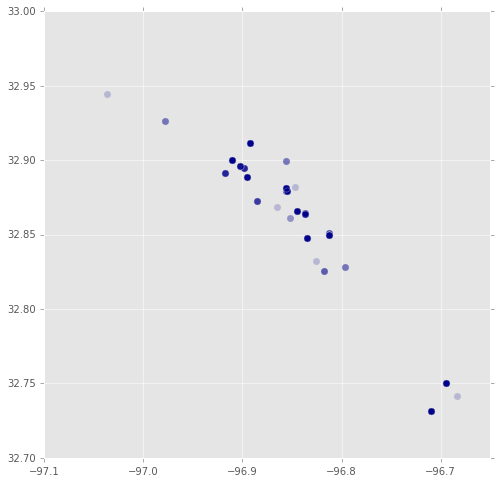

In [31]:
# TODO: Plot the Cell Towers the user connected to
#
# .. your code here ..
fig = plt.figure(figsize(8,8))
ax = fig.add_subplot(111)
ax.scatter(user1_weekdays_call_hr['TowerLon'], user1_weekdays_call_hr['TowerLat'], 
           c='darkblue',marker='o',alpha=0.2, s=50)

In [74]:
# INFO: Run K-Means with K=3 or K=4. There really should only be a two areas of concentration. 
# If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR
# apart from one another), then increase K=5, with the goal being that all centroids except two will
# sweep up the annoying outliers and not-home, not-work travel occasions. the other two will zero in
# on the user's approximate home location and work locations. Or rather the location of the cell
# tower closest to them.....
from sklearn.cluster import KMeans

def doKMeans(data, clusters=0):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. 
    # Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required. 
    # Print out the centroid locations and add them onto your scatter plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first).
    # This is part of your domain expertise.
    #
    # .. your code here ..
    model = KMeans(n_clusters=clusters)
    mydata = data.loc[:,('TowerLon', 'TowerLat')]
    model.fit(mydata)
    labels = model.predict(mydata)
    centroids = model.cluster_centers_
    print centroids
    
    fig = plt.figure(figsize(8,8))
    ax = fig.add_subplot(111)
    ax.scatter(x=mydata.TowerLon, y=mydata.TowerLat, marker='o', alpha=0.2, s=50)
    ax.scatter(x=centroids[:,0], y=centroids[:,1], marker='x', c='red',alpha=0.5, s=150, linewidths=3)
    
    return model

In [77]:
def showandtell(title=None):
    if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
    plt.show()
    exit()

In [78]:
## To print clutser information
def clusterInfo(model):
    print "Cluster Analysis Inertia: ", model.inertia_
    print '------------------------------------------'
    for i in range(len(model.cluster_centers_)):
        print "\n  Cluster ", i
        print "    Centroid ", model.cluster_centers_[i]
        print "    #Samples ", (model.labels_==i).sum() # NumPy Power

In [128]:
# INFO: Print out the mean CallTime value for the samples belonging to the cluster with the LEAST
# samples attached to it. If our logic is correct, the cluster with the MOST samples will be work.
# The cluster with the 2nd most samples will be home. And the K=3 cluster with the least samples
# should be somewhere in between the two. What time, on average, is the user in between home and
# work, between the midnight and 5pm?

# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()
    print "\n  Cluster With Fewest Samples: ", minCluster
    return (model.labels_==minCluster)

[[-96.71180248  32.73511797]
 [-96.9100889   32.90005261]
 [-96.82975483  32.84852111]]


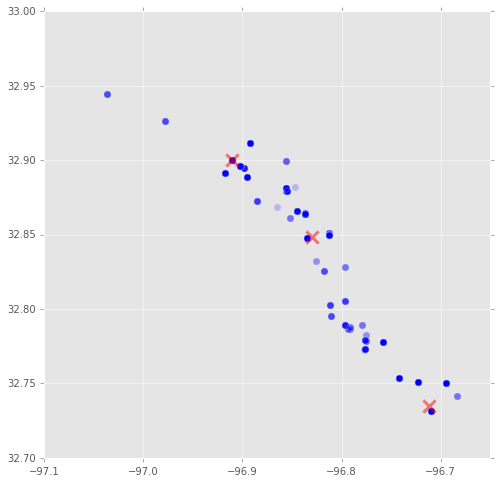

In [79]:
model = doKMeans(user1, 3)

In [80]:
clusterInfo(model) # k=3 

Cluster Analysis Inertia:  0.844427906514
------------------------------------------

  Cluster  0
    Centroid  [-96.71180248  32.73511797]
    #Samples  1585

  Cluster  1
    Centroid  [-96.9100889   32.90005261]
    #Samples  1869

  Cluster  2
    Centroid  [-96.82975483  32.84852111]
    #Samples  194


In [83]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print "    Its Waypoint Time: ", midWaySamples.CallTime.mean()


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 10:21:51.238005


[[-96.71007432  32.7338725 ]
 [-96.91020527  32.90005332]
 [-96.83889576  32.86383354]
 [-96.78330222  32.78620631]]


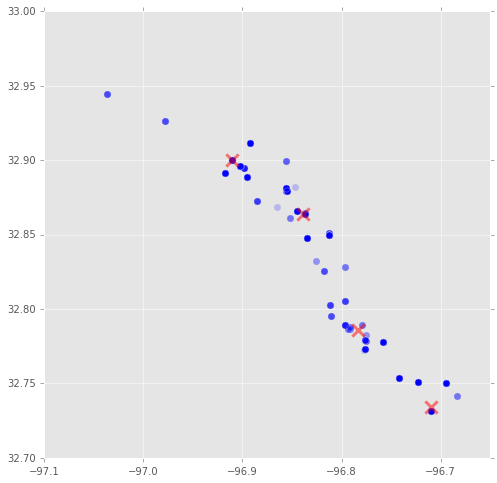

In [84]:
model = doKMeans(user1, 4)

In [85]:
clusterInfo(model) # k=4

Cluster Analysis Inertia:  0.427029778736
------------------------------------------

  Cluster  0
    Centroid  [-96.71007432  32.7338725 ]
    #Samples  1539

  Cluster  1
    Centroid  [-96.91020527  32.90005332]
    #Samples  1865

  Cluster  2
    Centroid  [-96.83889576  32.86383354]
    #Samples  156

  Cluster  3
    Centroid  [-96.78330222  32.78620631]
    #Samples  88


In [86]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print "    Its Waypoint Time: ", midWaySamples.CallTime.mean()


  Cluster With Fewest Samples:  3
    Its Waypoint Time:  0 days 18:00:42.618384


[[-96.909681    32.89986103]
 [-96.71007432  32.7338725 ]
 [-96.78330222  32.78620631]
 [-96.83889576  32.86383354]
 [-97.007458    32.9357225 ]]


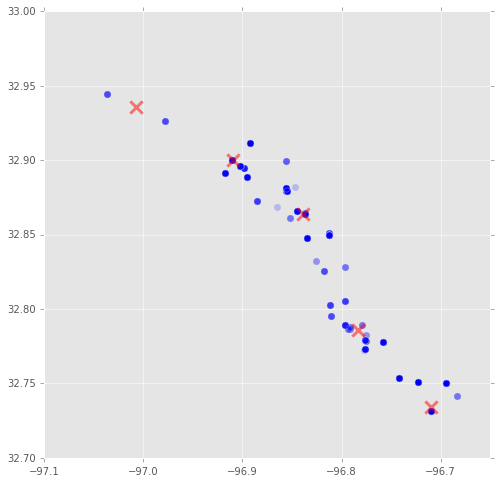

In [91]:
model = doKMeans(user1, 5)

In [92]:
clusterInfo(model) # k=5

Cluster Analysis Inertia:  0.319147481276
------------------------------------------

  Cluster  0
    Centroid  [-96.909681    32.89986103]
    #Samples  1855

  Cluster  1
    Centroid  [-96.71007432  32.7338725 ]
    #Samples  1539

  Cluster  2
    Centroid  [-96.78330222  32.78620631]
    #Samples  88

  Cluster  3
    Centroid  [-96.83889576  32.86383354]
    #Samples  156

  Cluster  4
    Centroid  [-97.007458   32.9357225]
    #Samples  10


In [93]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print "    Its Waypoint Time: ", midWaySamples.CallTime.mean()


  Cluster With Fewest Samples:  4
    Its Waypoint Time:  0 days 13:14:45.828741


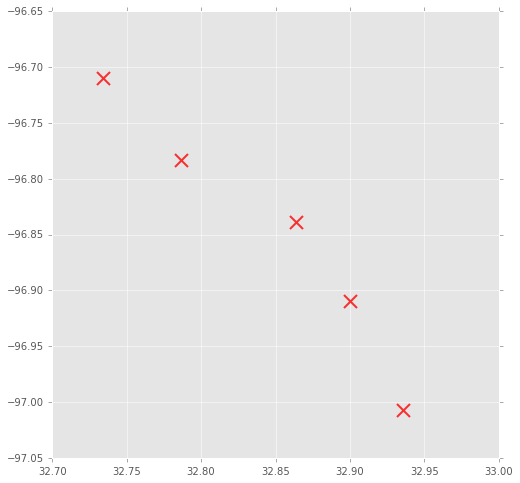

In [57]:
# Let's visualize the results!
# First draw the X's for the clusters:
fig = plt.figure(figsize(8,8))
ax = fig.add_subplot(111)
ax.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)

#
# Then save the results:
#showandtell('Weekday Calls Centroids')  # Comment this line out when you're ready to proceed

### Lab Questions 5.3.

(3 points possible)
Answer the following questions given the data you just recorded, for K=4, and CallTime is less than 5pm (that is "17:00:00"), and the call's day-of-week being a weekday.

##### Q1. The users home location will likely be near the centroid with the second most attached samples. Does your approximated home location from this map coincide with the home approximation from the previous lab?
A. Yes, they are exactly the same
B. Yes, they match, but there is a slight difference
C. No, you can tell that they should match; however, their locations are *very* different
D. No, they are completely different

* My 1st answer: C (<== Incorrect!)
* My 2nd answer: B (<== <b>Correct!</b>)


##### Q2. Given the indexed time range, and the times people usually receive / make calls, the cluster with the most samples is likely to be the user's work location. What is the phone number of the user who works at the US Post Office near Cockrell Hill Rd?

A. 463-847-2273,  
B. 206-862-7935
C. 289-436-5987
D. 155-941-0755
E. 368-808-9071

* My answer: C (<== <b>Correct!</b>)


##### Q3. Run your assignment with K=3. Look at the code that gets the mean CallTime value for the cluster with the least amount of samples assigned to it (the cluster we suspect corresponds to the user transiting to work). What hour is the average CallTime value of that cluster closest to?

A. 5am
B. 6am
C. 7am
D. 8am
E. 9am
F. 10am
G. 11am

* My 1st answer: F (<== Incorrect!)
* My 2nd answer: D (<== <b>Correct!</b>)



#### CallTime Clarification

Your calculated average calltime should be on a per-cluster basis. Recall, each user in your dataset has 3 clusters, and you're only interested in the cluster-per-user with the fewest # of samples--that is, the least number of .lables_. So you should have 10 clusters total, each with a certain # of samples, and you want to calculate the average time per cluster.

In [62]:
# For Lab question 5.2
incall_list

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [66]:
usersForQ2 = cdr_df[ cdr_df['In'].isin( [4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
usersForQ2.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [67]:
users_q2_weekdays = usersForQ2[~((usersForQ2['DOW'] == 'Sat') | (usersForQ2['DOW'] == 'Sun')) ]
users_q2_weekdays
users_q2_weekdays.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
161,4638472273,5912117253,Missed,2010-12-27,18:41:14.639828,Mon,0:00:20.304073,09756fb6-223f-43e9-9402-9b90c7048639,32.805667,-96.796667
162,1559410755,6092528894,Incoming,2010-12-27,13:58:15.173497,Mon,0:02:39.474541,78dc86cb-a8f2-4da8-b7c2-ff09e6e73579,32.696083,-96.934333
163,1559410755,5510742109,Incoming,2010-12-27,19:26:17.851404,Mon,0:03:50.854513,8b54cc68-bb4d-4baf-b824-4cd1ba67bfb0,32.870972,-96.923556
164,1559410755,8484043137,Missed,2010-12-27,06:46:48.804762,Mon,0:05:41.296615,f958754c-3d55-47c4-8236-50b964a7b997,32.870972,-96.923556
165,1559410755,4091221367,Incoming,2010-12-27,19:29:34.024910,Mon,0:04:18.209604,3adc057c-4ec8-44b7-bf6b-7b1c4fe9a99a,32.870972,-96.923556


In [68]:
users_q2_weekdays_hr = users_q2_weekdays[(users_q2_weekdays['CallTime'] < "17:00:00") ]
users_q2_weekdays_hr.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
162,1559410755,6092528894,Incoming,2010-12-27,13:58:15.173497,Mon,0:02:39.474541,78dc86cb-a8f2-4da8-b7c2-ff09e6e73579,32.696083,-96.934333
164,1559410755,8484043137,Missed,2010-12-27,06:46:48.804762,Mon,0:05:41.296615,f958754c-3d55-47c4-8236-50b964a7b997,32.870972,-96.923556
167,1559410755,5452154622,Incoming,2010-12-27,07:46:33.266193,Mon,0:06:17.798725,6672464e-9093-499b-947f-322a6e4441fb,32.696083,-96.934333
168,1559410755,1747156055,Incoming,2010-12-27,06:55:06.699239,Mon,0:04:06.506535,af8c4c52-6d95-4892-86c2-ee80c4831256,32.870972,-96.923556
169,1559410755,7818412902,Incoming,2010-12-27,06:09:32.957209,Mon,0:05:41.989601,8b54cc68-bb4d-4baf-b824-4cd1ba67bfb0,32.870972,-96.923556


[[-96.85855475  32.86004126]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

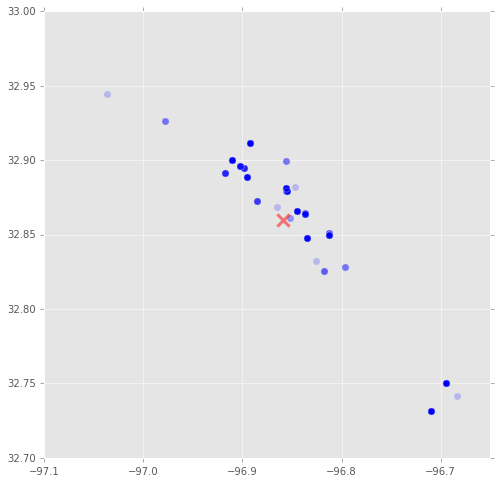

In [69]:
#4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
doKMeans(users_q2_weekdays_hr[users_q2_weekdays_hr['In']==4638472273], 1)

[[-96.78345663  32.71715133]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

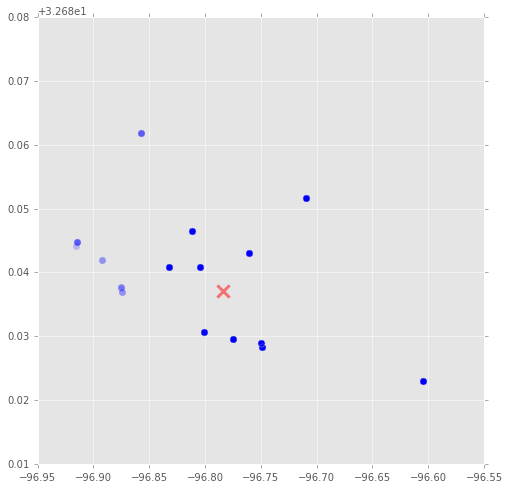

In [70]:
#4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
doKMeans(users_q2_weekdays_hr[users_q2_weekdays_hr['In']==2068627935], 1)

[[-96.87163244  32.73439654]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

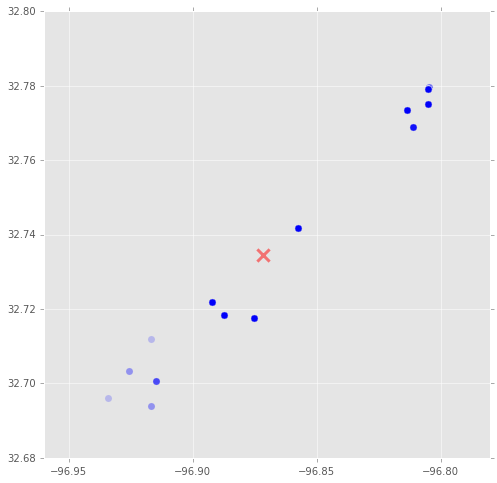

In [71]:
#4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
doKMeans(users_q2_weekdays_hr[users_q2_weekdays_hr['In']==2894365987], 1)

[[-96.93124919  32.73571155]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

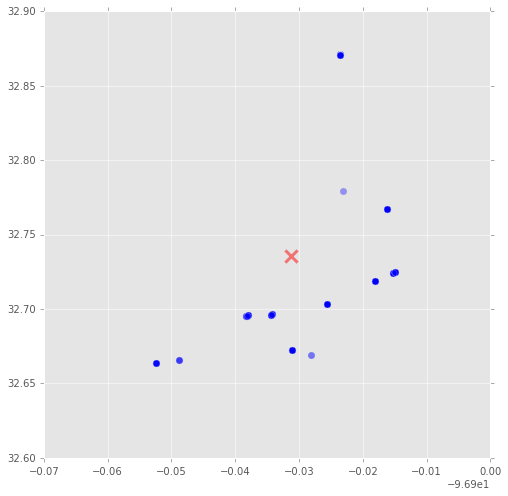

In [72]:
#4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
doKMeans(users_q2_weekdays_hr[users_q2_weekdays_hr['In']==1559410755], 1)

[[-96.82805831  32.80290143]]


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

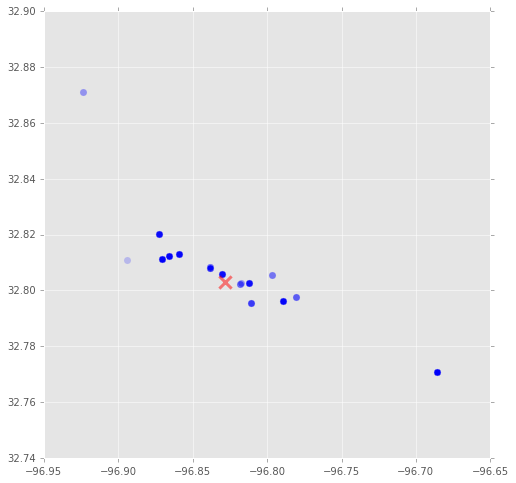

In [73]:
#4638472273, 2068627935, 2894365987, 1559410755, 3688089071]) ] 
doKMeans(users_q2_weekdays_hr[users_q2_weekdays_hr['In']==3688089071], 1)

In [98]:
## Lab question 5.3
def doKMeans_q53(data, clusters=3):
    model = KMeans(n_clusters=clusters)
    mydata = data.loc[:,('TowerLon', 'TowerLat')]
    model.fit(mydata)
    labels = model.predict(mydata)
    centroids = model.cluster_centers_
    print centroids
    
    #fig = plt.figure(figsize(8,8))
    #ax = fig.add_subplot(111)
    #ax.scatter(x=mydata.TowerLon, y=mydata.TowerLat, marker='o', alpha=0.2, s=50)
    #ax.scatter(x=centroids[:,0], y=centroids[:,1], marker='x', c='red',alpha=0.5, s=150, linewidths=3)
    return model

In [102]:
usersForQ53 = cdr_df[~((cdr_df['DOW'] == 'Sat') | (cdr_df['DOW'] == 'Sun')) ]
usersForQ53 = usersForQ3[(usersForQ3['CallTime'] < "17:00:00") ]
usersForQ53.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
162,1559410755,6092528894,Incoming,2010-12-27,13:58:15.173497,Mon,0:02:39.474541,78dc86cb-a8f2-4da8-b7c2-ff09e6e73579,32.696083,-96.934333
164,1559410755,8484043137,Missed,2010-12-27,06:46:48.804762,Mon,0:05:41.296615,f958754c-3d55-47c4-8236-50b964a7b997,32.870972,-96.923556
167,1559410755,5452154622,Incoming,2010-12-27,07:46:33.266193,Mon,0:06:17.798725,6672464e-9093-499b-947f-322a6e4441fb,32.696083,-96.934333
168,1559410755,1747156055,Incoming,2010-12-27,06:55:06.699239,Mon,0:04:06.506535,af8c4c52-6d95-4892-86c2-ee80c4831256,32.870972,-96.923556
169,1559410755,7818412902,Incoming,2010-12-27,06:09:32.957209,Mon,0:05:41.989601,8b54cc68-bb4d-4baf-b824-4cd1ba67bfb0,32.870972,-96.923556


In [129]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()
    print "\n  Cluster With Fewest Samples: ", minCluster
    return (model.labels_==minCluster)

In [138]:
# My custom method
callTimeMeans = []
for i in range(len(incall_list)):
    print "***** user %d:" %(i), "***************************************"
    myuser_q53 = usersForQ53[usersForQ53['In'] == incall_list[i]]
    mymodel_q53 = doKMeans_q53(myuser_q53)
    print 
    clusterInfo(mymodel_q53)
    midWayClusterIndices = clusterWithFewestSamples(mymodel_q53)
    midWaySamples = myuser_q53[midWayClusterIndices]
    callTimeMeans.append(midWaySamples.CallTime.mean())
    print "    Its Waypoint Time: ", midWaySamples.CallTime.mean()
    print 

print "***** midWaySample CallTime Mean Values ***********"  
for i in callTimeMeans:
    print i

***** user 0: ***************************************
[[-96.90951639  32.9000009 ]
 [-96.70816184  32.73323174]
 [-96.83818346  32.86348712]]

Cluster Analysis Inertia:  0.158910695238
------------------------------------------

  Cluster  0
    Centroid  [-96.90951639  32.9000009 ]
    #Samples  959

  Cluster  1
    Centroid  [-96.70816184  32.73323174]
    #Samples  306

  Cluster  2
    Centroid  [-96.83818346  32.86348712]
    #Samples  140

  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:49:53.168115

***** user 1: ***************************************
[[-96.93522725  32.69557708]
 [-96.92355104  32.87096795]
 [-96.9164561   32.73762409]]

Cluster Analysis Inertia:  0.265744617758
------------------------------------------

  Cluster  0
    Centroid  [-96.93522725  32.69557708]
    #Samples  3121

  Cluster  1
    Centroid  [-96.92355104  32.87096795]
    #Samples  921

  Cluster  2
    Centroid  [-96.9164561   32.73762409]
    #Samples  360

  Cluster With 

In [69]:
######################################################################

### Lab Assignment 5.4

Feature scaling was first discussed within one of the PCA lab assignments, but this lab will really familiarize you with it. You will be making use of the <b>Wholesale Customer's</b> dataset, hosted by UCI's Machine Learning. <i>Unsupervised clustering</i> scans your features and then groups your samples based off of them. Therefore you should have a solid understanding of what each of your features are, which one's you should remove, and how to scale them in order for the 'blind' clustering to preform correctly and do what you want it to do.

1. Visit the [UCI dataset page](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) and read all the content available, so you become accustomed to the dataset. Then, load up the starter code from Module5/assignment4.py and as usual, read through that it in its entirety as well.
2. The first thing that needs to be answered is, what is it you'd like to accomplish by clustering this dataset? There are a couple of potential questions you could ask given the data, and the one you choose will drive how you manipulate your dataset. Are you interested in which products people buy together, so that you can place them near one another in your store, or recommend the pair product when shopping online? Perhaps you're more interested in which products people are spending the most money on? Or maybe your interest just lies in identifying what individual products people are buying. All of this must be considered.
3. For the purposes of this lab, you'll assume you're interested in overall customer behavior rather than channel or region specific behavior, so you'll drop those two fields from the dataset. If you were a large wholesaler with branches all over the nation, you'd want to keep those fields in so that you can duplicate the process outlined in the assignment to particular areas and vertical markets.
4. Complete the assignment and answer the questions.

In [52]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%pylab inline
matplotlib.style.use('ggplot')
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [53]:
# TODO: Parameters to play around with
PLOT_TYPE_TEXT = False    # If you'd like to see indices
PLOT_VECTORS = True       # If you'd like to see your original features in P.C.-Space

c = ['red','green','blue','orange','yellow','brown']

In [54]:
# TODO: Load up the dataset. It has may or may not have NaNs in it. 
# Make sure you catch them and destroy them, by setting them to '0'. 
# This is valid for this dataset, since if the value is missing, 
# you can assume no $ was spent on it.
#
# .. your code here ..
whsales_df = pd.read_csv('Module5/Datasets/Wholesale customers data.csv')
whsales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
whsales_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [56]:
whsales_df = whsales_df.fillna(0)
whsales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [57]:
# TODO: As instructed, get rid of the 'Channel' and 'Region' columns, since
# you'll be investigating as if this were a single location wholesaler, rather
# than a national / international one. Leaving these fields in here would cause
# KMeans to examine and give weight to them.
#
# .. your code here ..
wsales_df2 = whsales_df.iloc[:, 2:]
wsales_df2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [58]:
# TODO: Before unitizing / standardizing / normalizing your data in preparation for
# K-Means, it's a good idea to get a quick peek at it. You can do this using the
# .describe() method, or even by using the built-in pandas df.plot.hist()
#
# .. your code here ..
wsales_df2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


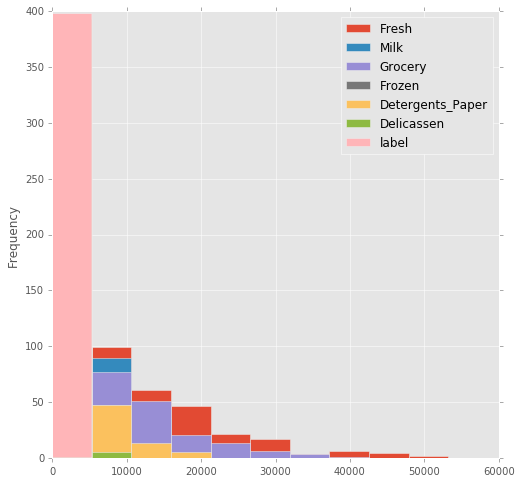

In [134]:
wsales_df2.plot.hist()

In [60]:
# INFO: Having checked out your data, you may have noticed there's a pretty big gap
# between the top customers in each feature category and the rest. Some feature
# scaling algos won't get rid of outliers for you, so it's a good idea to handle that
# manually---particularly if your goal is NOT to determine the top customers. 
# *After all, you can do that with a simple Pandas .sort_values() and not a machine
# learning clustering algorithm. From a business perspective, you're probably more
# interested in clustering your +/- 2 standard deviation customers, rather than the
# creme dela creme, or bottom of the barrel'ers

# Remove top 5 and bottom 5 samples for each column:
drop = {}
for col in wsales_df2.columns:
    # Bottom 5
    sort = wsales_df2.sort_values(by=col, ascending=True)
    if len(sort) > 5: sort=sort[:5]
    for index in sort.index: drop[index] = True # Just store the index once

    # Top 5
    sort = wsales_df2.sort_values(by=col, ascending=False)
    if len(sort) > 5: sort=sort[:5]
    for index in sort.index: drop[index] = True # Just store the index once

In [61]:
# INFO Drop rows by index. We do this all at once in case there is a
# collision. This way, we don't end up dropping more rows than we have
# to, if there is a single row that satisfies the drop for multiple columns.
# Since there are 6 rows, if we end up dropping < 5*6*2 = 60 rows, that means
# there indeed were collisions.
print "Dropping {0} Outliers...".format(len(drop))
wsales_df2.drop(inplace=True, labels=drop.keys(), axis=0)
#print wsales_df2.describe()

Dropping 42 Outliers...


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [62]:
wsales_df2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,10996.231156,5144.090452,7091.711055,2639.721106,2562.974874,1278.736181
std,9933.042596,5057.406574,6923.019293,2974.246906,3608.176776,1220.745297
min,37.000000,258.000000,314.000000,47.000000,10.000000,11.000000
25%,3324.500000,1571.250000,2155.500000,749.750000,273.250000,409.500000
50%,8257.500000,3607.500000,4573.000000,1526.000000,812.000000,946.500000
75%,15828.500000,6953.250000,9922.250000,3370.250000,3841.500000,1752.250000
max,53205.000000,29892.000000,39694.000000,17866.000000,19410.000000,7844.000000


In [63]:
# INFO: What are you interested in?
#
# Depending on what you're interested in, you might take a different approach
# to normalizing/standardizing your data.
# 
# You should note that all columns left in the dataset are of the same unit.
# You might ask yourself, do I even need to normalize / standardize the data?
# The answer depends on what you're trying to accomplish. 

# For instance, although all the units are the same (generic money unit), 
# the price per item in your store isn't. There may be some cheap items and some expensive one. 
# If your goal is to find out what items people buy tend to buy together but you didn't 
# unitize properly before running kMeans, the contribution of the lesser priced item would be
# dwarfed by the more expensive item.
#
# For a great overview on a few of the normalization methods supported in SKLearn, please check out: 
# https://stackoverflow.com/questions/30918781/right-function-for-normalizing-input-of-sklearn-svm
#
# Suffice to say, at the end of the day, you're going to have to know what question
# you want answered and what data you have available in order to select the best
# method for your purpose. Luckily, SKLearn's interfaces are easy to switch out
# so in the mean time, you can experiment with all of them and see how they alter
# your results.
#
#
# 5-sec summary before you dive deeper online:
#
# NORMALIZATION: Let's say your user spend a LOT. Normalization divides each item by
#                the average overall amount of spending. Stated differently, your
#                new feature is = the contribution of overall spending going into
#                that particular item: $spent on feature / $overall spent by sample
#
# MINMAX:        What % in the overall range of $spent by all users on THIS particular
#                feature is the current sample's feature at? When you're dealing with
#                all the same units, this will produce a near face-value amount. Be
#                careful though: if you have even a single outlier, it can cause all
#                your data to get squashed up in lower percentages.
#                Imagine your buyers usually spend $100 on wholesale milk, but today
#                only spent $20. This is the relationship you're trying to capture 
#                with MinMax. NOTE: MinMax doesn't standardize (std. dev.); it only
#                normalizes / unitizes your feature, in the mathematical sense.
#                MinMax can be used as an alternative to zero mean, unit variance scaling.
#                [(sampleFeatureValue-min) / (max-min)] * (max-min) + min
#                Where min and max are for the overall feature values for all samples.

In [64]:
# TODO: Un-comment just ***ONE*** of lines at a time and see how alters your results
# Pay attention to the direction of the arrows, as well as their LENGTHS

#T = wsales_df2 # No Change ''' Can cause Error in drawVector() '''
#T = preprocessing.StandardScaler().fit_transform(wsales_df2)
#T = preprocessing.MinMaxScaler().fit_transform(wsales_df2)
#T = preprocessing.MaxAbsScaler().fit_transform(wsales_df2)
T = preprocessing.Normalizer().fit_transform(wsales_df2)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [65]:
from sklearn.cluster import KMeans

In [66]:
# INFO: Sometimes people perform PCA before doing KMeans, so that KMeans only
# operates on the most meaningful features. In our case, there are so few features
# that doing PCA ahead of time isn't really necessary, and you can do KMeans in
# feature space. But keep in mind you have the option to transform your data to
# bring down its dimensionality. If you take that route, then your Clusters will
# already be in PCA-transformed feature space, and you won't have to project them
# again for visualization.

def doKMeans(data, clusters=0):
    # TODO: Do the KMeans clustering here, passing in the # of clusters parameter
    # and fit it against your data. Then, return a tuple containing the cluster
    # centers and the labels
    #
    # .. your code here ..
    model = KMeans(n_clusters=clusters)
    model.fit(data)
    #labels = model.predict(data)
    #centroids = model.cluster_centers_
    return model.cluster_centers_, model.labels_

# Do KMeans
n_clusters = 3
centroids, labels = doKMeans(T, n_clusters)

In [67]:
# TODO: Print out your centroids. They're currently in feature-space, which is good. 
# Print them out before you transform them into PCA space for viewing
#
# .. your code here ..
print centroids
print
print labels

[[ 0.70684426  0.21171881  0.24907971  0.53766137  0.05026163  0.08927489]
 [ 0.2684144   0.49388307  0.67048633  0.10898233  0.26452767  0.10321558]
 [ 0.91261641  0.17207579  0.23548806  0.11840287  0.05372368  0.0709344 ]]

[2 1 1 0 2 2 2 1 1 1 1 2 2 2 2 2 1 1 2 1 2 0 2 2 2 2 2 1 2 2 1 2 2 1 1 2 1
 2 2 1 1 1 1 1 1 1 0 1 2 1 2 1 1 2 1 1 1 1 0 2 1 2 0 0 0 1 1 1 2 1 2 1 1 2
 2 0 2 2 0 1 1 0 1 1 1 2 2 1 1 1 2 1 0 2 2 2 2 2 2 0 2 0 1 2 2 2 2 0 2 2 2
 2 2 1 1 2 1 2 2 0 2 2 2 0 2 2 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 0 1 1 1 1 1
 1 2 2 2 0 2 1 1 2 0 1 1 0 2 2 1 2 0 1 2 2 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1
 2 0 2 1 0 0 2 2 2 0 1 0 0 1 2 2 1 2 2 2 2 0 2 2 2 1 1 2 2 2 0 0 1 0 2 1 2
 2 0 2 2 0 2 1 1 1 1 2 1 2 0 1 1 2 1 2 0 0 2 1 2 2 2 2 2 0 2 2 1 0 1 1 2 2
 2 1 1 1 2 1 1 1 1 1 1 2 2 1 0 2 1 0 2 1 2 1 2 1 1 2 2 2 2 0 1 0 0 2 1 2 0
 2 2 0 0 1 1 1 1 0 1 1 2 0 1 0 1 1 1 0 1 1 1 1 2 2 1 2 0 1 2 0 2 2 2 2 2 2
 2 2 1 2 1 1 2 0 2 0 1 2 1 2 2 2 0 1 1 2 2 2 1 0 0 2 0 0 2 2 2 2 2 1 2 2 2
 1 1 0 0 1 1 1 1 2 2 2 

In [68]:
from sklearn.decomposition import RandomizedPCA

In [69]:
# Do PCA *after* to visualize the results. Project the centroids as well as 
# the samples into the new 2D feature space for visualization purposes.
def doPCA(data, dimensions=2):
    model = RandomizedPCA(n_components=dimensions)
    model.fit(data)
    return model

display_pca = doPCA(T) # T는 위에서 T = preprocessing.Normalizer().fit_transform(wsales_df2)
T = display_pca.transform(T)
CC = display_pca.transform(centroids)

In [70]:
def drawVectors(transformed_features, components_, columns, plt):
    num_columns = len(columns)

    # This function will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## Visualize projections

    # Sort each column by its length. These are your *original*
    # columns, not the principal components.
    import math
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print "Projected Features by importance:\n", important_features

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75, zorder=600000)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75, zorder=600000)
    return ax

Projected Features by importance:
[(0.698143447068888, 'Frozen'), (0.6075841086893123, 'Fresh'), (0.45071609105334226, 'Grocery'), (0.2806970358024964, 'Milk'), (0.23050289842768254, 'Detergents_Paper'), (0.07434865145530702, 'Delicassen')]
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  label
0    12669   9656     7561     214              2674        1338      2
1     7057   9810     9568    1762              3293        1776      1
2     6353   8808     7684    2405              3516        7844      1
3    13265   1196     4221    6404               507        1788      0
4    22615   5410     7198    3915              1777        5185      2
5     9413   8259     5126     666              1795        1451      2
6    12126   3199     6975     480              3140         545      2
7     7579   4956     9426    1669              3321        2566      1
8     5963   3648     6192     425              1716         750      1
9     6006  11093    18881    1159     

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


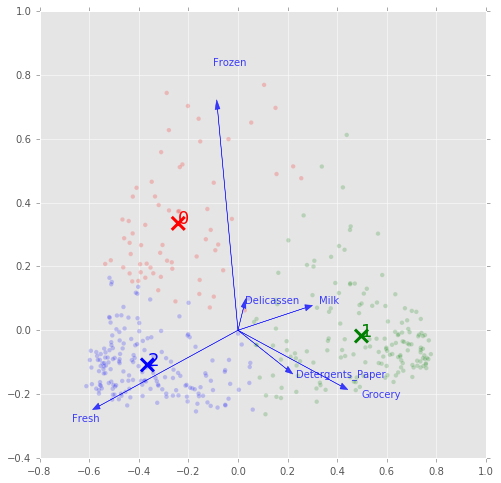

In [71]:
# Visualize all the samples. Give them the color of their cluster label
fig = plt.figure(figsize(8,8))
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
    # Plot the index of the sample, so you can further investigate it in your dset
    for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
    ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
    ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
    # Plot a regular scatter plot
    sample_colors = [ c[labels[i]] for i in range(len(T)) ]
    ax.scatter(T[:, 0], T[:, 1], c=sample_colors, marker='o', alpha=0.2)

# Plot the Centroids as X's, and label them
ax.scatter(CC[:, 0], CC[:, 1], marker='x', s=169, linewidths=3, zorder=1000, c=c)
for i in range(len(centroids)): ax.text(CC[i, 0], CC[i, 1], str(i), zorder=500010, fontsize=18, color=c[i])

# Display feature vectors for investigation:
''' Note: Error caused when T = wsales_df2 (#No Change)'''
if PLOT_VECTORS: drawVectors(T, display_pca.components_, wsales_df2.columns, plt)

# Add the cluster label back into the dataframe and display it:
wsales_df2['label'] = pd.Series(labels, index=wsales_df2.index)
print wsales_df2

plt.show()

### Lab Questions 5.4.

##### Q. Which of SciKit-Learn's preprocessors causes the principal components to fan out as much as possible in an arrangement unlike the others?

- StanadardScaler
- MinMaxScaler
- Normalize 
- Scale
- No scaling necessary

<b>* My answer</b>: Normalize (<== <b>Correct!</b>)

<b>* Explanation</b>: Normalizing has a slight 'correlating' effect, since each sample's features get scaled by the overall sample's magnitude. This causes it to behave in a manner unique compared to the other scalers, which act on a per-feature basis. The result is visibly discernible, and each sample's feature-values becomes their unitized contribution to the sample's overall magnitude.

In [70]:
######################################################################

### Lab Assignment 5.5.

Remember that wheat dataset you used while exploring visualizations? It's about to make a comeback! While learning the many classification algorithms we're going to cover in the next few sections, it's a good idea to have a 'benchmark dataset' to come back to, so you can can compare the performance and accuracy of other algorithms.

1. Start by looking through the starter code /Module5/assignment5.py and /Module1/Datasets/wheat.data
2. Complete the assignment except for the bonus instruction.
3. Try experimenting with other feature scaling methods, in addition to normalize(), to see how they affect the decision boundary.
4. Then, answer the following questions.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

Populating the interactive namespace from numpy and matplotlib


In [100]:
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv('Module5/Datasets/wheat.data')
X.head()

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [101]:
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = X['wheat_type'].copy()
X.drop(labels=['id', 'wheat_type'], inplace=True, axis=1)    #  <--  기억할 것 !!!!!

X.head()

,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [102]:
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
y.dtype # dtype('O') means 'objects'

dtype('O')

In [103]:
# just for my testing
unique(y)

array(['canadian', 'kama', 'rosa'], dtype=object)

In [104]:
# Convert to category
y = y.astype("category").cat.codes # <-- Remember this. ex) df['colname'] = df['colname'].astype("category").cat.codes
print y.dtype
y.head()

int8


0    1
1    1
2    1
3    1
4    1
dtype: int8

In [105]:
X.dtypes

area           float64
perimeter      float64
compactness    float64
length         float64
width          float64
asymmetry      float64
groove         float64
dtype: object

In [109]:
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
X.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64

In [110]:
# Just for my testing
X.groove.isnull().sum()

0

In [111]:
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here .. 

# X.compactness.fillna(X.compactness.mean(), inplace=True) # Same 
X['compactness'].fillna(X['compactness'].mean(), inplace=True)    # fillna() 결과를 따로 할당할 필요 없음
X['width'].fillna(X['width'].mean(), inplace=True)
X['groove'].fillna(X['groove'].mean(), inplace=True)
X.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64

In [112]:
# (Testing):  for문 사용해서 각각의 column을 mean()으로 fillna  할 수 없음 (이유는 col이 str object임)
'''
for col in X.columns:
    #print col.dtype
    if col.isnull.sum() != 0:
        col.fillna(col.mean())
'''
#---------------------------------------------------------------------------
#AttributeError                            Traceback (most recent call last)
#<ipython-input-36-94d704b0ec72> in <module>()
#      1 for col in X.columns:
#----> 2     print col.dtype
#
#AttributeError: 'str' object has no attribute 'dtype'

'\nfor col in X.columns:\n    #print col.dtype\n    if col.isnull.sum() != 0:\n        col.fillna(col.mean())\n'

In [113]:
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. 
# This is important so that your answers are verifiable. 
# In the real world, you wouldn't specify a random_state.
#
# .. your code here ..
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [114]:
len(X_train), len(X_test), len(y_train), len(y_test)

(140, 70, 140, 70)

In [115]:
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn import preprocessing 

normalizer = preprocessing.Normalizer().fit(X_train)  # fit does nothing
normalizer 

#T = preprocessing.normalize(X) # 다른 애

Normalizer(copy=True, norm='l2')

In [122]:
# TODO: With your trained pre-processor, transform both your training AND testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has been fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
trans_train_data = normalizer.transform(X_train)
trans_test_data = normalizer.transform(X_test)

In [123]:
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(trans_train_data)

PCA(copy=True, n_components=2, whiten=False)

In [125]:
X_train_pca = pca.transform(trans_train_data)
X_test_pca = pca.transform(trans_test_data)

In [144]:
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

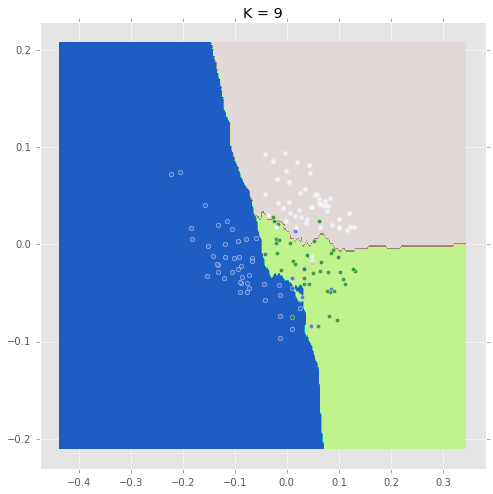

In [145]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))


# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, X_train_pca, y_train)

In [146]:
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..

prediction = knn.predict(X_test_pca)
prediction

array([1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1,
       2], dtype=int8)

In [147]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.87142857142857144

In [148]:
# Other's code (Same effect)
print knn.score(X_test_pca, y_test)

0.871428571429


In [143]:
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.
fig = plt.figure(figsize(8,8))
plt.show()

### Lab Questions 5.5.

##### Q1. Please enter a numeric value (e.g. 0, 1, 10.5, etc) which correctly answers the question(s) below:

What is the accuracy score of your KNeighbors Classifier when K=9 (Enter as a decimal)?
 
<b>* My answer</b>: 0.871428571429 (<== <b>Correct!</b>)

<b>* Explanation</b>: Follow the steps in the starter code file. Each 'TODO' should be accomplishable with just 1-4 lines of code. The accuracy value you should be getting if you set the random state properly is 0.871428571429.


##### Q2. Decrease K by 1 and record the new accuracy score. Keep doing this until you get down to, and including, K=1. Concerning the scores you saw: 

- (a) I was able to get one higher reading
- (b) I did not see the same accuracy again
- (c) The accuracy went down, but then started going up again
- (d) I got the same result, but overfit my data.

<b>* My answer</b>: (d) I got the same result, but overfit my data. (<== <b>Correct!</b>) (score값이 같아 맞추긴 했는데 왜 overfit이지
?)

<b>* Explanation</b>: You should also have been able to see that same accuracy score one other time, surprisingly, when K=1. However this is overfitting your data.

In [149]:
# Note !!
# Congratulations on training your computer to identify wheat kernels! 
# As you know, PCA throws away some of your data. 
# Yet, you were able to get the high accuracy level you got in this lab by 
# applying KNeighbors to just two principal components! 

# If you're ready for a bonus experiment, remove both the PCA code as well as 
# the visualization code from the lab. 

# Run the KNeighbors Classifier on your entire X_train dataset and see how it 
# performs compared to the PCA-only version you just completed above. 
# Does it perform better? Or worse?

# You can also try properly encoding the wheat_type series as a dummy feature, 
# spanning three columns. If you attempt that, be sure to adjust your .predict() 
# and .score() methods to fit.

In [ ]:
######################################################################

### Lab Assignment 5.6.

In this assignment, you'll flex your understanding of Isomap and KNeighbors, as well as practice splitting your data for testing and evaluation by taking your Module4/assignment4.py lab to the next level. If you haven't been able to complete module four's labs or haven't fully understood them, take a moment to re-do them all before proceeding.

This assignment was engineered to be truer to the life of a data scientist by being more challenging than previous ones, so do not be disheartened. If data explorers only needed to drop their observations into black-box algorithms without investing time to toggle parameters, and experiment and understand what those algorithms were truly doing to their data, they wouldn't be valued as much.

In module four's fourth lab assignment, you explored using isomap, an indispensable tool to have while working with non-linear datasets. Your goal this time is to train the KNeighborsClassifier to identify what direction a face is pointing towards: either up, down, left, or right.

![alt text](http://courses.edx.org/asset-v1:Microsoft+DAT210x+4T2016+type@asset+block@Facing.png "Title")

This data takes the form of image samples that have been transformed either using PCA to reduce their linear dimensionality, or isomap to non-linearly do similar. Start by reviewing your lab work in the Module4/<b>assignment4.py</b> file before opening up the /Module5/<b>assignment6.py</b> starter code. You will need access to the <b>face_data.mat</b> file from Module four, as well as the new Module5/<b>face_labels.csv</b> file.

1. Add in the Module4/assignment4.py code responsible for: loading up the .mat file, properly rotating its images, and storing the whole thing into a Pandas dataframe object.
2. Load into a dataframe your classifications faces_labels.csv file. Make sure your dataframe and your .csv file align properly and start from the same values! This classification dataframe only has a single column in it, so create a series (a slice) that selects only that column and save it as label.
3. Do your train_test_split just as directed in the reading. Set random_state=7, and play around with test_size as documented. Your variables should be: data_train, data_test, label_train, and label_test.
4. Fill out the code for PCA, Isomap, and KNeighborsClassifier. Both PCA and Isomap should be reducing your training data's dimensionality down to 2D. You're free to experiment with different K values for KNeighborsClassifier.
5. Predict the accuracy of the test dataset / test label using .score() and print it out.
6. Answer the questions below:

In [92]:
# Load libraries
import random, math
import pandas as pd
import numpy as np
import scipy.io

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

In [93]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
#Test_PCA = True
Test_PCA = False

In [73]:
# TODO: Use the same code from Module4/assignment4.py to load up the face_data.mat 
# in a dataset called "df". Be sure to calculate the num_pixels value, and to rotate 
# the images to being right-side-up instead of sideways. 
# This was demonstrated in the M4/A4 code:
# .. your code here ..

# (From Module4/assgnment4.py)
# A .MAT file is a .MATLAB file. The faces dataset could have came in through .png images, 
# but we'll show you how to do that in anither lab. For now, you'll see how to import .mats:
mat = scipy.io.loadmat('Module4/Datasets/face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))

# Rotate the pictures, so we don't have to crane our necks:
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].reshape(num_pixels, num_pixels).T.reshape(-1)

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000781,0,0,0,0,0,0,0,0,0
1,0.016176,0.000000,0.000000,0.000000,0.007062,0.056710,0.192279,0.380607,0.504733,0.514920,...,0.000000,0,0,0,0,0,0,0,0,0
2,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0,0,0,0,0,0,0,0
3,0.016176,0.110754,0.384988,0.510034,0.608609,0.743229,0.735126,0.664675,0.774494,0.792233,...,0.000000,0,0,0,0,0,0,0,0,0
4,0.016176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0,0,0,0,0,0,0,0


In [75]:
df.shape

(698, 4096)

In [76]:
# TODO: Load up your face_labels dataset. It only has a single column, and
# you're only interested in that single column. You will have to slice the 
# column out so that you have access to it as a "Series" rather than as a
# "Dataframe". Use an appropriate indexer to take care of that. Also print
# out the labels and compare to the face_labels.csv file to ensure you
# loaded it correctly
#
# .. your code here ..
face_label = pd.read_csv('Module5/Datasets/face_labels.csv')
face_label.head()

,0
0,2
1,0
2,2
3,0
4,2


In [77]:
# (continued)
myseries_label = face_label.iloc[:,0]
print "myseries_label.dtype: ", myseries_label.dtype
print "type(myseries): ", type(myseries_label)
myseries_label.head()

myseries_label.dtype:  int64
type(myseries):  <class 'pandas.core.series.Series'>


0    2
1    0
2    2
3    0
4    2
Name: 0, dtype: int64

In [78]:
myseries_label.shape

(697,)

In [79]:
myseries_label.isnull().sum()

0

In [80]:
df.isnull().sum().sum()

0

In [81]:
# TODO: Do train_test_split. Use the same code as on the EdX platform in the
# reading material, but set the random_state=7 for reproduceability, and play
# around with the test_size from 0.10 - 0.20 (10-20%). 

# Your labels are actually passed in as a series (instead of as an NDArray) so that 
# you can access their underlying indices later on. This is necessary so you can find 
# your samples in the original dataframe, which you will use to plot your testing data 
# as images rather than as points:
#
# .. your code here ..

In [82]:
# Remove the first row in df because lengths of df & label do not match
df.drop(df.index[:1], inplace=True)
len(df)

697

In [84]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import manifold # isomap
from sklearn.neighbors import KNeighborsClassifier

In [100]:
''' 
#  처음에는 train_test_split를 PCA / isoMap fit & transform  보다 먼저 해야하는 줄 알았음

#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)
data_train, data_test, label_train, label_test = train_test_split(df, myseries_label, test_size=0.10, random_state=7)
len(data_train), len(data_train), len(label_train), len(label_train)
'''

' \n#  \xec\xb2\x98\xec\x9d\x8c\xec\x97\x90\xeb\x8a\x94 train_test_split\xeb\xa5\xbc PCA / isoMap fit & transform  \xeb\xb3\xb4\xeb\x8b\xa4 \xeb\xa8\xbc\xec\xa0\x80 \xed\x95\xb4\xec\x95\xbc\xed\x95\x98\xeb\x8a\x94 \xec\xa4\x84 \xec\x95\x8c\xec\x95\x98\xec\x9d\x8c\n\n#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)\ndata_train, data_test, label_train, label_test = train_test_split(df, myseries_label, test_size=0.10, random_state=7)\nlen(data_train), len(data_train), len(label_train), len(label_train)\n'

In [61]:
'''
#train_test_split를 PCA / isoMap fit & transform  보다 먼저 했던 걸로 실행한 경우
if Test_PCA:
    # INFO: PCA is used *before* KNeighbors to simplify your high dimensionality 
    # image samples down to just 2 principal components! A lot of information
    # (variance) is lost during the process, as I'm sure you can imagine. But
    # you have to drop the dimension down to two, otherwise you wouldn't be able
    # to visualize a 2D decision surface / boundary. In the wild, you'd probably
    # leave in a lot more dimensions, but wouldn't need to plot the boundary;
    # simply checking the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D
    #
    # TODO: Implement PCA here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    pca = PCA(n_components=2)
    pca.fit(data_train)
    data_train = pca.transform(data_train)
    data_test = pca.transform(data_test)
    
else:
    # INFO: Isomap is used *before* KNeighbors to simplify your high dimensionality
    # image samples down to just 2 components! A lot of information has been is
    # lost during the process, as I'm sure you can imagine. But if you have
    # non-linear data that can be represented on a 2D manifold, you probably will
    # be left with a far superior dataset to use for classification. Plus by
    # having the images in 2D space, you can plot them as well as visualize a 2D
    # decision surface / boundary. In the wild, you'd probably leave in a lot
    # more dimensions, but wouldn't need to plot the boundary; simply checking
    # the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D

    #
    # TODO: Implement Isomap here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    iso = manifold.Isomap(n_neighbors = 6, n_components=2)
    iso.fit(data_train)
    data_train = iso.transform(data_train)
    data_test = iso.transform(data_test)'''

In [94]:
if Test_PCA:
    # INFO: PCA is used *before* KNeighbors to simplify your high dimensionality 
    # image samples down to just 2 principal components! A lot of information
    # (variance) is lost during the process, as I'm sure you can imagine. But
    # you have to drop the dimension down to two, otherwise you wouldn't be able
    # to visualize a 2D decision surface / boundary. In the wild, you'd probably
    # leave in a lot more dimensions, but wouldn't need to plot the boundary;
    # simply checking the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D
    #
    # TODO: Implement PCA here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    pca = PCA(n_components=2)
    pca.fit(df)
    trans_df = pca.transform(df)
    
else:
    # INFO: Isomap is used *before* KNeighbors to simplify your high dimensionality
    # image samples down to just 2 components! A lot of information has been is
    # lost during the process, as I'm sure you can imagine. But if you have
    # non-linear data that can be represented on a 2D manifold, you probably will
    # be left with a far superior dataset to use for classification. Plus by
    # having the images in 2D space, you can plot them as well as visualize a 2D
    # decision surface / boundary. In the wild, you'd probably leave in a lot
    # more dimensions, but wouldn't need to plot the boundary; simply checking
    # the results would suffice.
    #
    # Your model should only be trained (fit) against the training data (data_train)
    # Once you've done this, you need use the model to transform both data_train
    # and data_test from their original high-D image feature space, down to 2D

    #
    # TODO: Implement Isomap here. ONLY train against your training data, but
    # transform both your training + test data, storing the results back into
    # data_train, and data_test.
    #
    # .. your code here ..
    iso = manifold.Isomap(n_neighbors = 6, n_components=2)
    iso.fit(df)
    trans_df = iso.transform(df)

In [101]:
#data_train, data_test, label_train, label_test = train_test_split(face_label, myseries_label, test_size=0.10, random_state=7)
data_train, data_test, label_train, label_test = train_test_split(trans_df, myseries_label, test_size=0.10, random_state=7)
len(data_train), len(data_train), len(label_train), len(label_train)

(627, 627, 627, 627)

In [102]:
# TODO: Implement KNeighborsClassifier here. You can use any K value from 1
# through 20, so play around with it and attempt to get good accuracy.
# This is the heart of this assignment: Looking at the 2D points that
# represent your images, along with a list of "answers" or correct class
# labels that those 2d representations should be.
#
# .. your code here ..
knn = KNeighborsClassifier(n_neighbors=9) # try 1~20
knn.fit(data_train, label_train)

# NOTE: K-NEIGHBORS DOES NOT CARE WHAT THE ANSWERS SHOULD BE! In fact, it
# just tosses that information away. All KNeighbors cares about storing is
# your training data (data_train) so that later on when you attempt to
# predict or score samples, it can derive a class for them based on the
# labeling of the sample's near neighbors.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [97]:
# TODO: Calculate + Print the accuracy of the testing set (data_test and
# label_test).
#
# .. your code here ..
prediction = knn.predict(data_test)
prediction

array([0, 0, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 3, 2, 3, 1, 0, 0, 3, 2, 1, 2, 0, 3,
       2, 0, 2, 0, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 0, 2, 2, 3, 3, 0, 0, 0, 2,
       3])

In [98]:
print knn.score(data_test, label_test)

0.957142857143


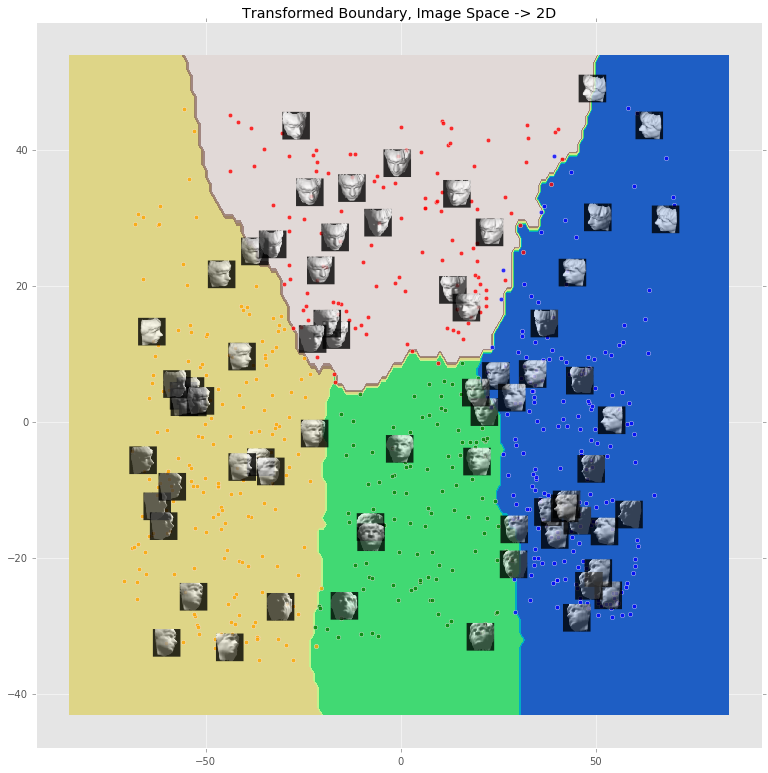

In [99]:
def Plot2DBoundary(DTrain, LTrain, DTest, LTest):
    # The dots are training samples (img not drawn), and the pics are testing samples (images drawn)
    # Play around with the K values. This is very controlled dataset so it should be able to get perfect classification on testing entries
    # Play with the K for isomap, play with the K for neighbors. 

    fig = plt.figure(figsize(13,13))
    ax = fig.add_subplot(111)
    ax.set_title('Transformed Boundary, Image Space -> 2D')

    padding = 0.1   # Zoom out
    resolution = 1  # Don't get too detailed; smaller values (finer rez) will take longer to compute
    colors = ['blue','green','orange','red']


    # ------

    # Calculate the boundaries of the mesh grid. The mesh grid is
    # a standard grid (think graph paper), where each point will be
    # sent to the classifier (KNeighbors) to predict what class it
    # belongs to. This is why KNeighbors has to be trained against
    # 2D data, so we can produce this countour. Once we have the 
    # label for each point on the grid, we can color it appropriately
    # and plot it.
    x_min, x_max = DTrain[:, 0].min(), DTrain[:, 0].max()
    y_min, y_max = DTrain[:, 1].min(), DTrain[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Using the boundaries, actually make the 2D Grid Matrix:
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say about each spot on the chart?
    # The values stored in the matrix are the predictions of the model
    # at said location:
    model = knn # I added 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the mesh grid as a filled contour plot:
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, z=-100)


    # ------

    # When plotting the testing images, used to validate if the algorithm
    # is functioning correctly, size them as 5% of the overall chart size
    x_size = x_range * 0.05
    y_size = y_range * 0.05

    # First, plot the images in your TEST dataset
    img_num = 0
    for index in LTest.index:
        # DTest is a regular NDArray, so you'll iterate over that 1 at a time.
        x0, y0 = DTest[img_num,0]-x_size/2., DTest[img_num,1]-y_size/2.
        x1, y1 = DTest[img_num,0]+x_size/2., DTest[img_num,1]+y_size/2.

        # DTest = our images isomap-transformed into 2D. But we still want
        # to plot the original image, so we look to the original, untouched
        # dataset (at index) to get the pixels:
        img = df.iloc[index,:].reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1), alpha=0.8)
        img_num += 1


    # Plot your TRAINING points as well... as points rather than as images
    for label in range(len(np.unique(LTrain))):
        indices = np.where(LTrain == label)
        ax.scatter(DTrain[indices, 0], DTrain[indices, 1], c=colors[label], alpha=0.8, marker='o')

    # Plot
    plt.show()  


# Chart the combined decision boundary, the training data as 2D plots, and
# the testing data as small images so we can visually validate performance.
Plot2DBoundary(data_train, label_train, data_test, label_test)


### Lab Questions 5.6.

##### Q. Only one of the following setups is ideal if you plan on using SciKit-Learn's KNeighbors classifier to predict the label of your samples after transforming them. Which is it?

- (a) Fit and transform your data using PCA or Isomap. Split your data. Then fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (b) Use preprocessing to scale your training and testing data. Split your data. Fit and transform your training data using PCA or Isomap, and fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (c) Use preprocessing to scale your training and testing data. Split your data. Fit and transform your testing data using PCA or Isomap, and fit the KNeighbors model against the training data and labels. Then predict the class of your testing data.
- (d) Fit and transform your data using PCA or Isomap. Then fit the KNeighbors model against your data and labels. Then split your data and predict the class of your testing data. 

<b>* My 1st answer</b>: (b) (<== <b>Correct!</b>)
<b>* My 2nd answer</b>: (a) (<== <b>Correct!</b>)

<b>* Explanation</b>: 
Preprocessing is not a requirement, so that has been thrown into the mix and a red herring. The important thing to note here is that you only want to split your data before the steps involved with the actual prediction. Isomap and PCA are used simply to transform your data, e.g. as preprocessing transformations. The same transformation needs to be applied to your testing and training data, and even to future unlabeled samples you encounter in the future.

It doesn't make sense to predict your testing data after you've trained your model against it, because it would have already seen the 'answers' or labels for it.

Also if you only transform your training data via PCA or Isomap but neglect to do so for your testing data, then you will have two different feature spaces and will not be able to use KNeighbors to predict a class between them.

In [ ]:
######################################################################

* [Google Search: MS Data Science in Python 관련 GitHubs](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#safe=off&q=github+Microsoft:+DAT210x++Module+5)
    
* http://scikit-learn.org/stable/modules/preprocessing.html
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html